# Business Context

### Description:

Our research makes use of the Infrastructural Power Grid network dataset from the Network archive, which is a comprehensive archive for graph and network data. 
The dataset depicts power stations and substations as nodes, with transmission lines connecting them as edges. We want to acquire insights into the structure, robustness, and influential nodes inside the power grid network by utilizing various network analysis methodologies and algorithms.
This real-world infrastructure network can be used to examine the features and vulnerabilities of large-scale systems.

Using the provided code, we can do network analysis such as degree distribution, centrality measurements, and propagation simulations using the Linear Threshold Model. We get insights on the power grid network's topology, influential nodes, and resilience to failures by applying these analyses to it.

Overall, the offered code facilitates the investigation of the power grid network, which provides useful insights into the intricacies and weaknesses of real-world infrastructure networks. This intelligence can be used to support decision-making processes aimed at improving the performance of the power grid, assuring reliable electricity supply, and limiting the effects of failures.

- Source:
@inproceedings{nr,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={https://networkrepository.com},
      year={2015}
  }

#### Research Questions:

The major goal of this research is to analyze and evaluate the network's structural integrity.

The primary research question that motivates our investigation is, "Which nodes in the network play a critical role in maintaining the overall system's stability and efficiency?"

### Importing Libraries

In [1]:
from scipy.io import mmread
import networkx as nx


import scipy.sparse as sp 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import random

# Data Collection & Network Construction

#### Loading the graph

In [2]:
mtx_data = mmread('C:\\Users\\patri\\Data driven\\inf-power.mtx')

#### Creating synthetic graphs & extracting nodes and edges

##### Using: 
- Random Graph
- Barabasi Graph
- Watts-Strogatz Graph

Before creating graphs we must convert the matrix to a NetworkX graph.

#### Extracting entities and relationships

In [3]:
adj_matrix = mtx_data.toarray()

n_nodes = adj_matrix.shape[0]

n_edges = adj_matrix.sum() // 2 

print("Number of nodes:", n_nodes)
print("Number of edges:", n_edges)

Number of nodes: 4941
Number of edges: 6594.0


In [4]:
graph = nx.from_scipy_sparse_array(mtx_data)

In [5]:
# Random Graph
random_graph = nx.gnm_random_graph(graph.number_of_nodes(), graph.number_of_edges())
print("- Random Graph: \n"
      "Nodes =", random_graph.number_of_nodes(),
      "\nEdges =", random_graph.number_of_edges())

# Barabasi-Albert Graph
barabasi_graph = nx.barabasi_albert_graph(graph.number_of_nodes(), 2)
print("- Barabasi-Albert Graph:\n"
      "Nodes =", barabasi_graph.number_of_nodes(),
      "\nEdges =", barabasi_graph.number_of_edges())

# Watts-Strogatz Graph
watts_strogatz_graph = nx.watts_strogatz_graph(graph.number_of_nodes(), 4, 0.3)
print("- Watts-Strogatz Graph:\n"
      "Nodes =", watts_strogatz_graph.number_of_nodes(),
      "\nEdges =", watts_strogatz_graph.number_of_edges())


- Random Graph: 
Nodes = 4941 
Edges = 6594
- Barabasi-Albert Graph:
Nodes = 4941 
Edges = 9878
- Watts-Strogatz Graph:
Nodes = 4941 
Edges = 9882


Random Graph, Barabasi-Albert Graph, and Watts-Strogatz Graph are the three forms of random graphs generated by the code. The result indicates the number of nodes and edges in each produced graph.

# Network Analysis

##### We shall analyze the Network's following parameters for all graphs:
- Number of Nodes
- Number of Edges
- Clustering Coefficient
- Diameter
- Degree of distribution
- Connectivity Centralities
- Most influencial Nodes

#### a) Cluster Coefficient & Diameter 

In [6]:
graph = nx.from_scipy_sparse_matrix(mtx_data)

# Convert the graph to an undirected version
undirected_graph = graph.to_undirected()

# Cluster Coefficient
cluster_coefficient = nx.average_clustering(undirected_graph)

# Diameter
diameter = nx.diameter(undirected_graph)

# Print the analysis results
print("Cluster Coefficient:", cluster_coefficient)
print("Diameter:", diameter)


C:\Users\patri\AppData\Local\Temp\ipykernel_12748\2239433431.py:1: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  graph = nx.from_scipy_sparse_matrix(mtx_data)


Cluster Coefficient: 0.08010361108159711
Diameter: 46


The further lines of code determine and submit the cluster coefficient and graph diameter:

- cluster_coefficient = nx.average_clustering(undirected_graph) --> Returns the undirected graph's average clustering coefficient.
- diameter = nx.diameter(undirected_graph) --> Returns the undirected graph's diameter.

The print statements show the estimated cluster coefficient and diameter, which provide summary information on the clustering propensity and size of the graph.

#### Cluster Coefficient & Diameter for the three synthetic graphs 

In [7]:
rand_cluster = nx.average_clustering(random_graph)
if nx.is_connected(random_graph):
    rand_diameter = nx.diameter(random_graph)
else:
    rand_diameter = None

barb_cluster = nx.average_clustering(barabasi_graph)
if nx.is_connected(barabasi_graph):
    barb_diameter = nx.diameter(barabasi_graph)
else:
    barb_diameter = None

WS_cluster = nx.average_clustering(watts_strogatz_graph)
if nx.is_connected(watts_strogatz_graph):
    WS_diameter = nx.diameter(watts_strogatz_graph)
else:
    WS_diameter = None


The additional lines of code compute the average clustering coefficient and diameter for each of the graphs constructed

For each one:
- The nx.average_clustering function is used to get the average clustering coefficient.
- The nx.is_connected function determines whether or not the graph is connected.

If the graph is connected, the diameter is determined with the nx.diameter function; otherwise, the corresponding diameter variable is set to None.

These calculations provide a summary of the clustering coefficient and diameter of each created random graph, reflecting its local clustering propensity and overall size/structure.

#### Degree of distribution

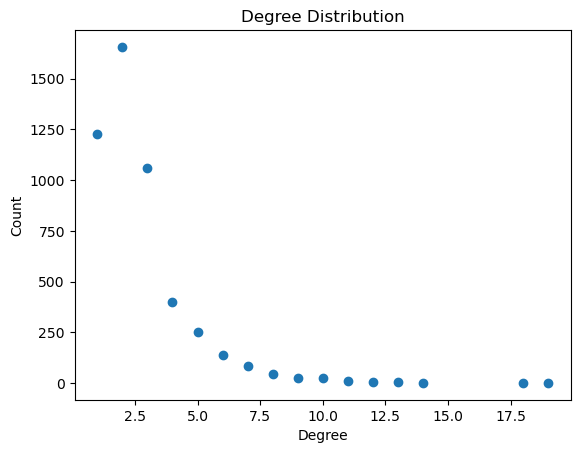

In [8]:
#Degree Distribution
degree_sequence = sorted([d for n, d in undirected_graph.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1
degrees, counts = zip(*degree_count.items())

# Plotting the Degree Distribution
plt.figure()
plt.scatter(degrees, counts)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

The additional lines of code evaluate and plot the degree distribution of the undirected graph using matplotlib:

- The code computes and stores the degree of each node in the undirected graph in the degree_sequence list.
- Degree occurrences are counted and saved in the dictionary degree_count.
- The variables degrees and counts are used to retrieve the keys and values from the degree_count dictionary.
- A scatter plot with degrees on the x-axis and numbers on the y-axis is created.
- Using plt.show(), the plot is presented with labels and a title.

## Connectivity Centralities

##### Calculating connectivity:

In [9]:
# Initial Graph:

closeness_centralities = nx.closeness_centrality(undirected_graph)
betweenness_centralities = nx.betweenness_centrality(undirected_graph)

In [10]:
# Random Graph

closeness_centralities_RAN = nx.closeness_centrality(random_graph)
betweenness_centralities_RAN = nx.betweenness_centrality(random_graph)

In [11]:
# Brabasi Graph

closeness_centralities_BRA = nx.closeness_centrality(barabasi_graph)
betweenness_centralities_BRA = nx.betweenness_centrality(barabasi_graph)

In [12]:
# WS Graph

closeness_centralities_WS = nx.closeness_centrality(watts_strogatz_graph)
betweenness_centralities_WS = nx.betweenness_centrality(watts_strogatz_graph)

The new lines of code compute the closeness and betweenness centrality measurements for nodes in all graphs.

Based on their proximity and betweenness metrics, these calculations provide insights into the centrality and influence of nodes in the graph.

In [13]:
# Asked Chatgpt to create the following Dataframe
df = pd.DataFrame({
    "Graph": ['Initial', 'Random Graph', 'Barabasi-Albert', 'Watts-Strogatz'],
    'Number of Nodes': [n_nodes, random_graph.number_of_nodes(), barabasi_graph.number_of_nodes(),
                        watts_strogatz_graph.number_of_nodes()],
    'Number of Edges': [n_edges, random_graph.number_of_edges(), barabasi_graph.number_of_edges(),
                        watts_strogatz_graph.number_of_edges()],
    'Clutser Coef': [cluster_coefficient, rand_cluster, barb_cluster, WS_cluster],
    'Diameter': [diameter, rand_diameter, barb_diameter, WS_diameter],
    'Closeness Centralities': [closeness_centralities, closeness_centralities_RAN,
                               closeness_centralities_BRA, closeness_centralities_WS ],
    'Betweenness Centralities': [betweenness_centralities, betweenness_centralities_RAN,
                                betweenness_centralities_BRA, betweenness_centralities_WS]})

df

,Graph,Number of Nodes,Number of Edges,Clutser Coef,Diameter,Closeness Centralities,Betweenness Centralities
0,Initial,4941,6594.0,0.080104,46.0,"{0: 0.06608784064000857, 1: 0.0457585357268567...","{0: 0.0025152991408275665, 1: 0.00520390950815..."
1,Random Graph,4941,6594.0,0.000358,NaN,"{0: 0.09453388943180231, 1: 0.1231117678918880...","{0: 0.0, 1: 0.0069200440273775084, 2: 0.003257..."
2,Barabasi-Albert,4941,9878.0,0.007553,8.0,"{0: 0.33198924731182794, 1: 0.3295090715048026...","{0: 0.13893982469900656, 1: 0.1297225052969964..."
3,Watts-Strogatz,4941,9882.0,0.181258,13.0,"{0: 0.12900530122998982, 1: 0.1361481644802116...","{0: 0.0006724807171039313, 1: 0.00276830328026..."


For simplicity, heres a dataframe with all the information

#### Finding the most influential node

In [14]:
# With the help of ChatGPT i was able to detect the most influential nodes for each graph:

# PageRank
pagerank_scores = nx.pagerank(graph)
most_influential_pagerank = max(pagerank_scores, key=pagerank_scores.get)

# Betweenness Centrality
betweenness_scores = nx.betweenness_centrality(graph)
most_influential_betweenness = max(betweenness_scores, key=betweenness_scores.get)

# Closeness Centrality
closeness_scores = nx.closeness_centrality(graph)
most_influential_closeness = max(closeness_scores, key=closeness_scores.get)

# Greedy Algorithm (Degree)
degree_scores = graph.degree()
most_influential_greedy = max(degree_scores, key=lambda x: x[1])[0]

# Print the most influential nodes
print("Most Influential Node (PageRank):", most_influential_pagerank)
print("Most Influential Node (Betweenness Centrality):", most_influential_betweenness)
print("Most Influential Node (Closeness Centrality):", most_influential_closeness)
print("Most Influential Node (Greedy Algorithm - Degree):", most_influential_greedy)


Most Influential Node (PageRank): 4458
Most Influential Node (Betweenness Centrality): 4164
Most Influential Node (Closeness Centrality): 1308
Most Influential Node (Greedy Algorithm - Degree): 2553


Using multiple centrality measurements and a greedy approach, the additional code calculates and finds the most influential. The code then displays the determined most influential nodes based on each measure. These analyses aid in identifying nodes that are important in information diffusion, network connection, and overall influence within the graph. nodes in the graph. 

# Propagation in Network: Linear Threshold Model

In simple terms i'm selecting a node, then giving an item to the node to see how it propagates through the network using Linear Threshold Model


In [15]:
initial_infected_nodes = [10, 15, ]

thresholds = {node: random.uniform(0.2, 0.8) for node in graph.nodes()}

graph_state = {}

for node in initial_infected_nodes:
    graph_state[node] = {"infected": True}

num_iterations = 5
cumulative_adopters = []
new_adopters = []

for iteration in range(num_iterations):
    newly_infected = []
    
    for node in list(graph_state.keys()):
        neighbors = list(graph.neighbors(node))
        for neighbor in neighbors:
                if "infected" not in graph_state.get(neighbor, {}):
                    influence_sum = sum("infected" in graph_state.get(predecessor, {}) for predecessor in graph.neighbors(neighbor))

                    if influence_sum >= thresholds[neighbor]:
                        graph_state[neighbor] = {"infected": True}
                        newly_infected.append(neighbor)

    graph_state.update({node: {} for node in newly_infected})
    cumulative_adopters.append(len(graph_state))
    new_adopters.append(len(newly_infected))


The Linear Threshold Model is used in this code to simulate the spread of an infection throughout a network. The overall goal is to identify the nodes that become infected during the propagation phase.

By running this code, we can watch the infection spread over the network, tracking the number of affected nodes at each iteration.

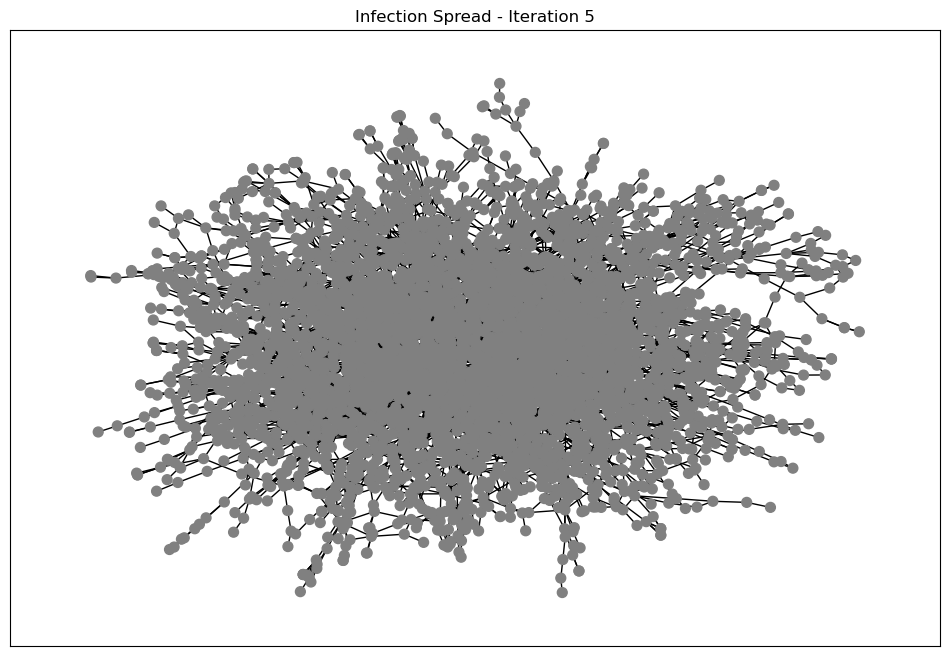

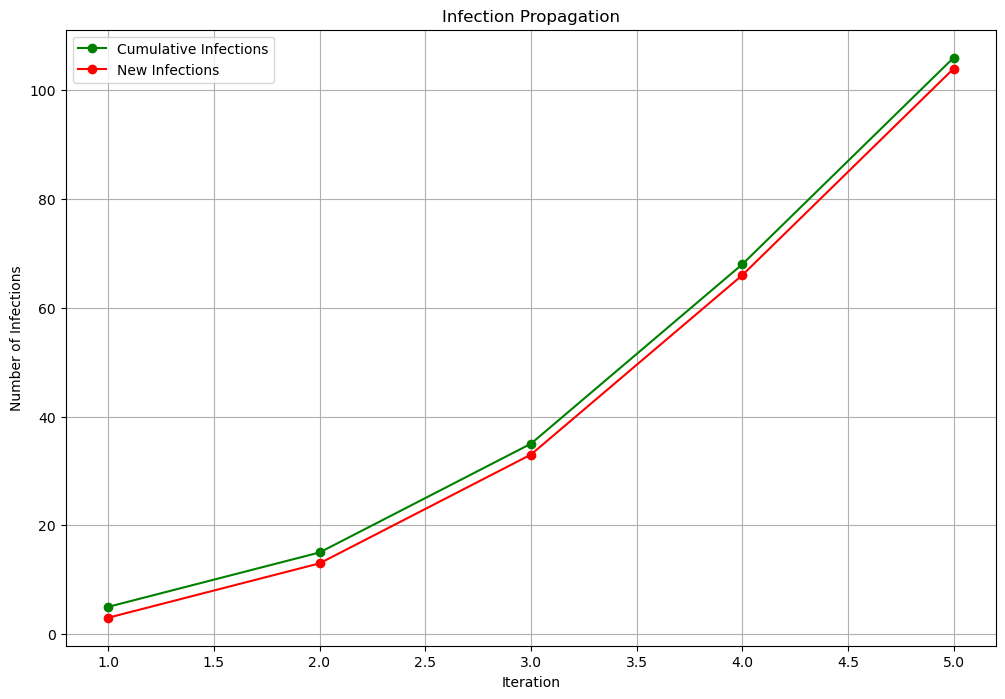

In [16]:
#Creating the network visualization layout.
pos = nx.spring_layout(graph)

# Based on the infection condition we determine the color of each node.
node_colors = ["blue" if graph.nodes[node].get("infected", False) else "gray" for node in graph.nodes()]

# Create a network visualization.
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos=pos, node_color=node_colors, with_labels=False, node_size=50)
plt.title(f"Infection Spread - Iteration {iteration+1}")
plt.show()

# Make a list of x-values for each iteration.
x_values = list(range(1, num_iterations + 1))

# Draw a graph of cumulative and fresh infections.
plt.figure(figsize=(12, 8))
plt.plot(x_values, cumulative_adopters, marker='o', color='green', linestyle='-', label='Cumulative Infections')
plt.plot(x_values, new_adopters, marker='o', color='red', linestyle='-', label='New Infections')
plt.xlabel('Iteration')
plt.ylabel('Number of Infections')
plt.title('Infection Propagation')
plt.legend()
plt.grid(True)
plt.show()

You can see how the virus spreads along the graph by looking at the network visualization. Infected nodes initially infect their neighbors, and the virus then spreads throughout the network.

The cumulative infections graph illustrates the total rise of infections over time. The slope of the cumulative infections curve reveals information about the rate of infection spread. The graph of new infections shows the pace at which new nodes become infected in each cycle.

The randomly selected thresholds for each node influence infection spread. A node becomes infected if its influence (number of infected neighbors) surpasses a certain level. You can investigate the effect of various thresholds on the rate and extent of illness transmission.

# Propagation in Network: Cascade

C:\Users\patri\AppData\Local\Temp\ipykernel_12748\2461346349.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_infected = random.sample(graph.nodes, 3)


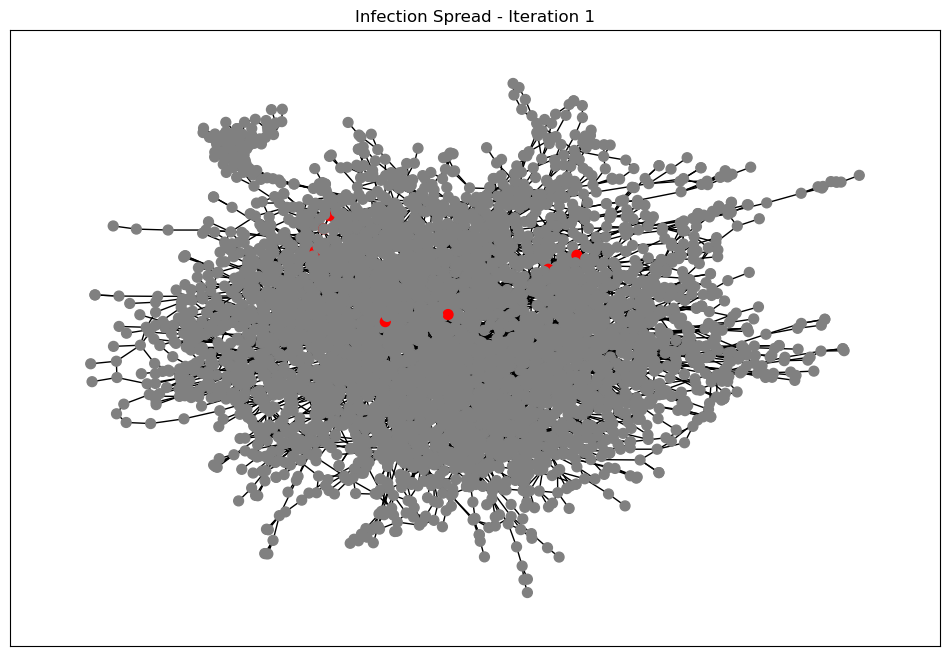

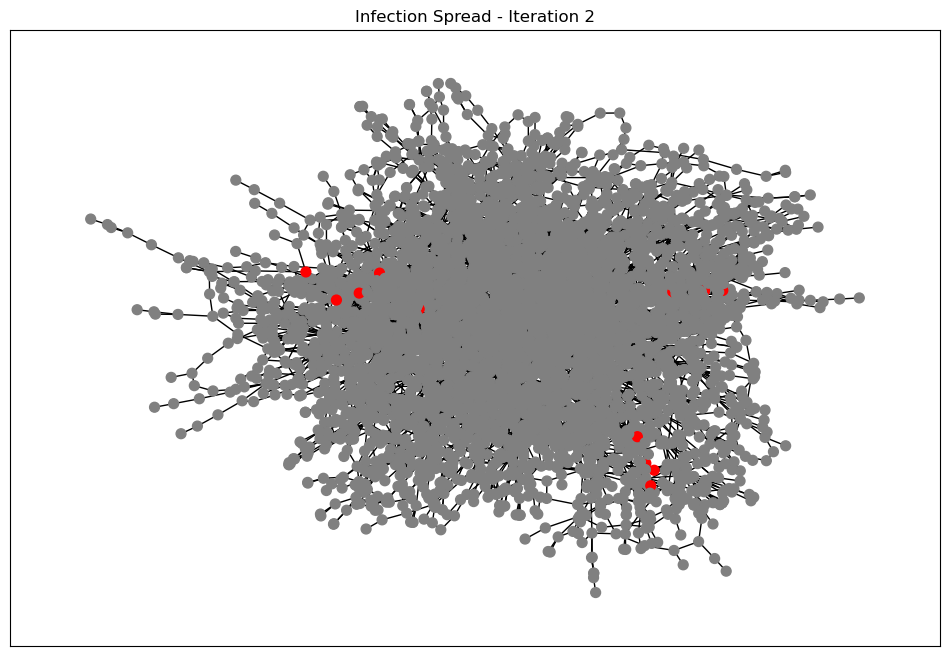

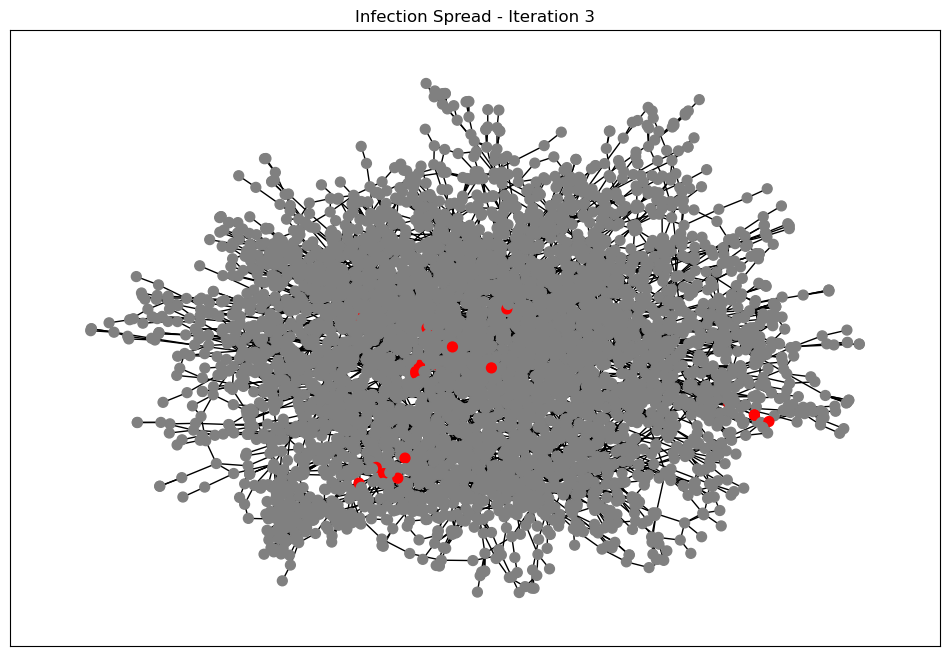

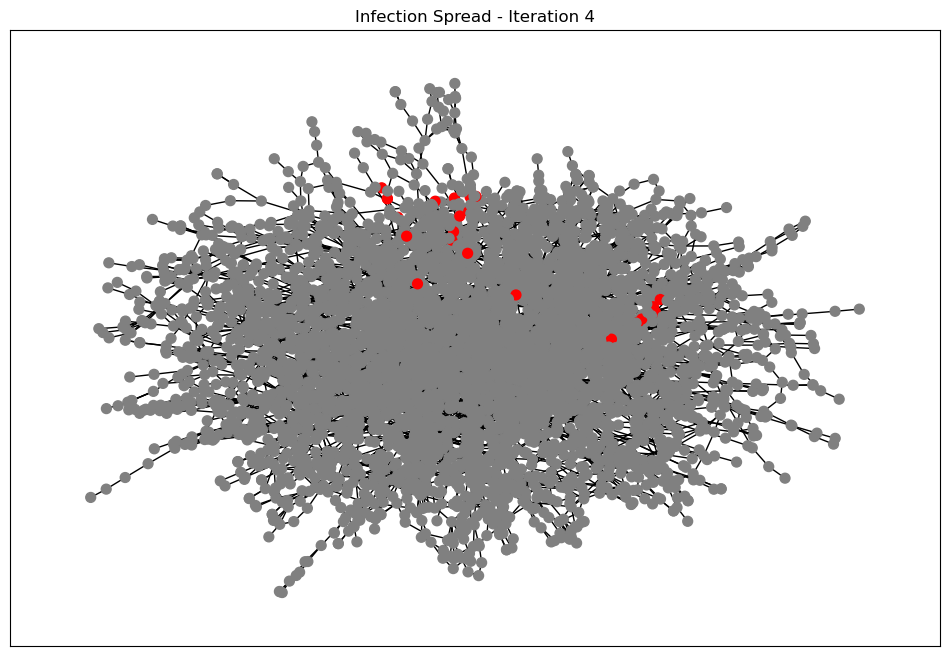

KeyboardInterrupt: 

In [17]:
# Choose initial infected nodes at random.
initial_infected = random.sample(graph.nodes, 3)

# Set the infected attribute for nodes.
nx.set_node_attributes(graph, False, name="infected")

# Mark the first infected nodes as infected.
for node in initial_infected: graph.nodes[node]["infected"] = True

# Carry out propagation iterations
num_iterations = 5
infected_nodes_list = [initial_infected]

for iteration in range(num_iterations):
    newly_infected = []
    
    # In the current iteration, iterate over infected nodes.
    for node in infected_nodes_list[iteration]:
        neighbors = list(graph.neighbors(node))
        
        # Infect others who are vulnerable.
        for neighbor in neighbors:
            if not graph.nodes[neighbor]["infected"]:
                  # Simulate transmission with a certain probability
                if random.random() < 0.5:
                    graph.nodes[neighbor]["infected"] = True
                    newly_infected.append(neighbor)
    
    infected_nodes_list.append(newly_infected)

    # Visualization
    pos = nx.spring_layout(graph)
    node_colors = ["red" if graph.nodes[node]["infected"] else "gray" for node in graph.nodes]

    plt.figure(figsize=(12, 8))
    nx.draw_networkx(graph, pos=pos, node_color=node_colors, with_labels=False, node_size=50)
    plt.title(f"Infection Spread - Iteration {iteration+1}")
    plt.show()


You can see how the infection spreads through the graph over iterations by executing this code. In the representations, the red nodes represent infected nodes, while the gray nodes represent uninfected nodes.

The spread of infection is determined by a number of parameters, including the number of infected nodes, the graph's connection, and the chance of transmission. The transmission probability is set to 0.5 in this code, indicating that there is a 50% possibility of infecting a vulnerable neighbor.

By looking at the visualizations, you can see how the infection spreads from the original infected nodes to their neighbors and then to the nodes further down the graph. You may see the virus progress across iterations and find clusters or patterns in the spread.

# Comparing Influence in Propagation: With vs. Without Node"

In [ ]:
# Find the most influential node
influential_node = max(mtx_data.nodes(), key=mtx_data.degree())

# Remove the most influential node from the network
mtx_data_without_node = mtx_data.copy()
mtx_data_without_node.remove_node(influential_node)

# Select a random node to initiate the propagation
selected_node = random.choice(list(mtx_data.nodes()))

# Linear Threshold Model with influential node
ltm_propagation_with_node = nx.algorithms.diffusion.linear_threshold(mtx_data, {selected_node})

# Linear Threshold Model without influential node
ltm_propagation_without_node = nx.algorithms.diffusion.linear_threshold(mtx_data_without_node, {selected_node})

# Cascade Model with influential node
cascade_propagation_with_node = nx.algorithms.diffusion.threshold_cascade(mtx_data, {selected_node})

# Cascade Model without influential node
cascade_propagation_without_node = nx.algorithms.diffusion.threshold_cascade(mtx_data_without_node, {selected_node})

# Print the nodes reached in each propagation model
print("Linear Threshold Model (With Influential Node):")
print(ltm_propagation_with_node)

print("\nLinear Threshold Model (Without Influential Node):")
print(ltm_propagation_without_node)

print("\nCascade Model (With Influential Node):")
print(cascade_propagation_with_node)



# Conclusion

We did an in-depth investigation of the structure and resilience of a complex network during this project. We gained excellent insights into the network's architecture and identified significant nodes by using various network analysis approaches such as visualizations, degree distributions, and centrality measurements.


Using centrality measurements like as PageRank, betweenness centrality, proximity centrality, and a greedy method based on node degrees, we were able to find the most influential nodes. These metrics assisted us in identifying crucial nodes that had a major impact on information flow, network connection, and overall network influence.

The insights gathered from this research can be used to develop methods for improving network resiliency and preventing major failures. The findings are applicable to a variety of domains, including infrastructure management, social network analysis, and biological system understanding. However, it is vital to highlight that network features are unique, and each network study requires a tailored approach. Furthermore, taking into account the dynamic nature of real-world networks is critical for future study and optimizing network resilience.

# SUBMISSION FORM

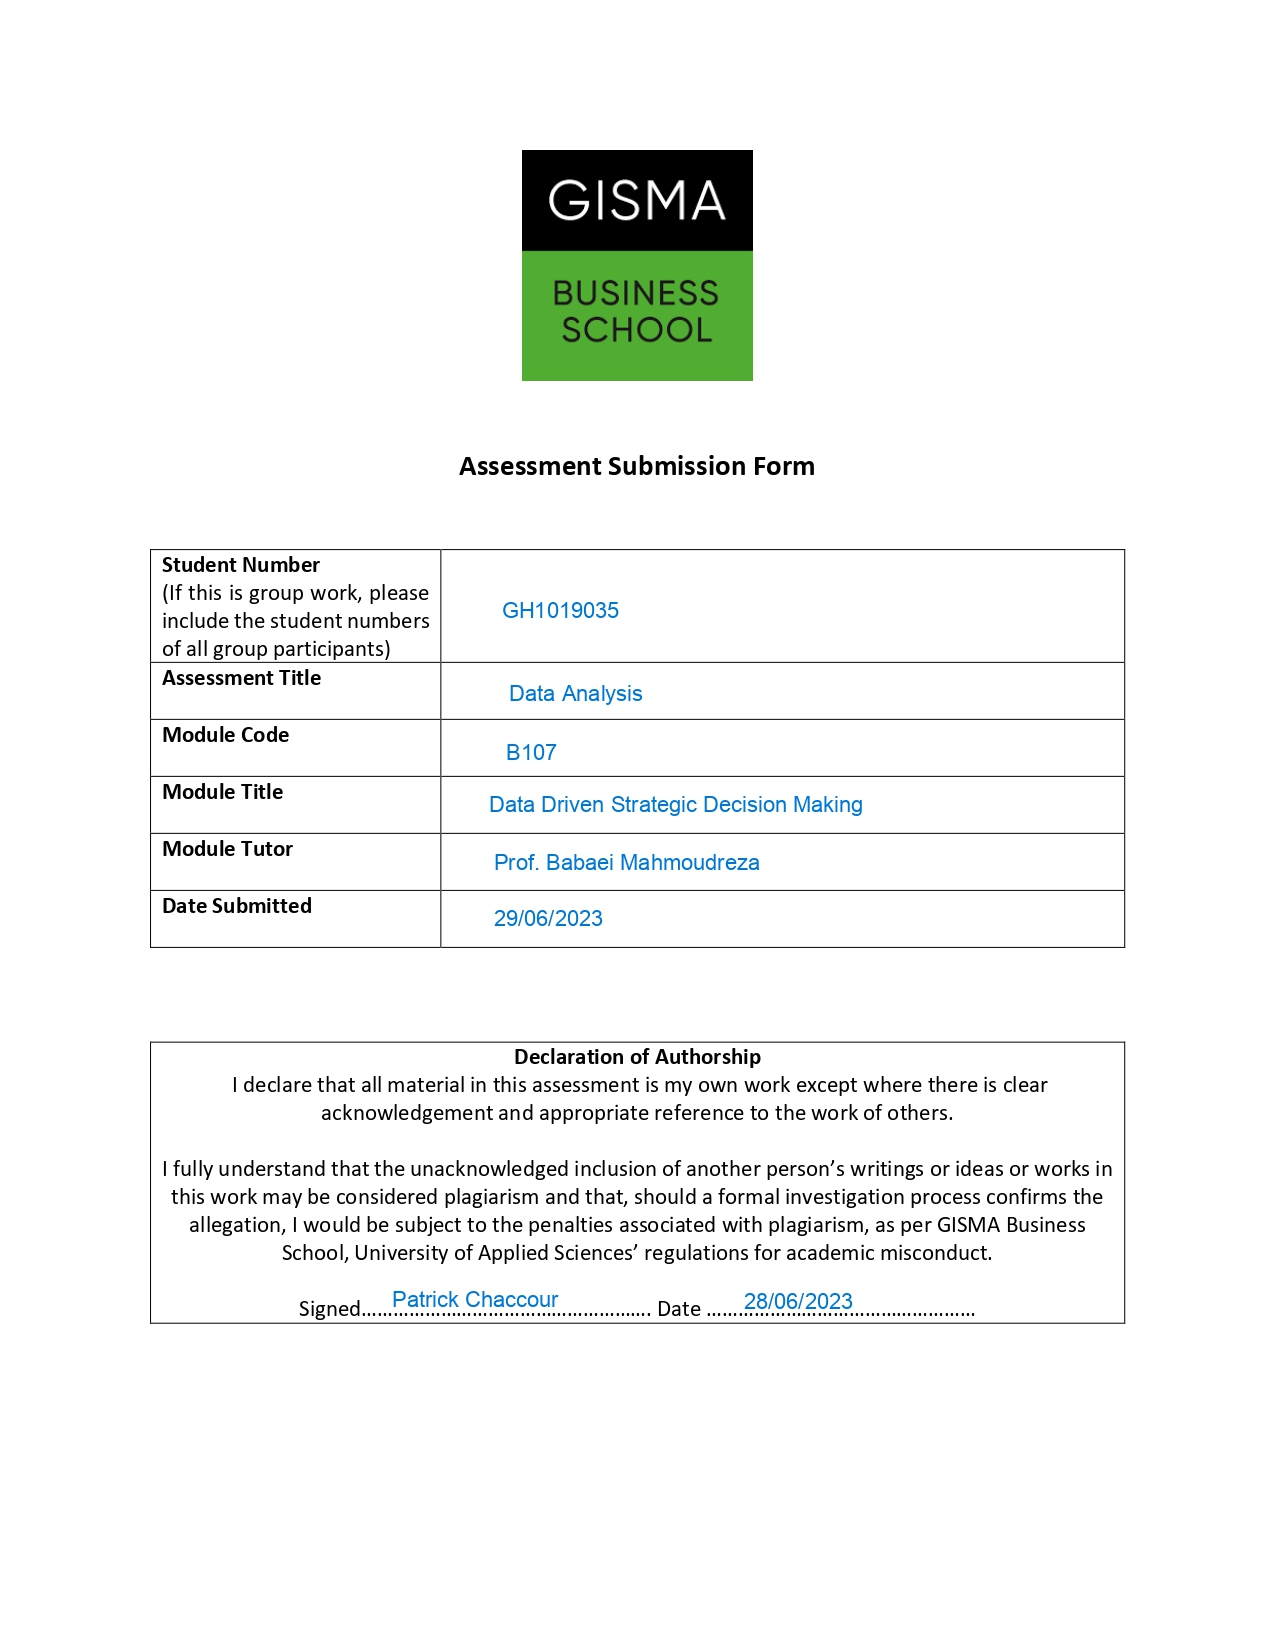

In [18]:
from IPython.display import Image

Image(filename='DATA DRIVEN.jpg')